In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

def round_to_next_minute(date_str):
    # convert to datetime object
    dt = datetime.datetime.fromisoformat(date_str)

    # check if minute has already begun
    if dt.second > 0:
        # add the remaining seconds to round up to next minute
        dt += datetime.timedelta(seconds=(60 - dt.second))

    # set seconds to zero
    dt = dt.replace(second=0, microsecond=0)

    # convert to desired format
    new_date_str = dt.strftime("%Y-%m-%d %H:%M:%S")

    return new_date_str

In [2]:
def read_csv_round_dates(file_path):
    # read CSV file into Pandas dataframe
    df = pd.read_csv(file_path)

    # round date column to next minute
    df['date'] = df['time'].apply(round_to_next_minute)

    # convert to desired format
    df['date'] = pd.to_datetime(df['date']).dt.strftime("%Y-%m-%d %H:%M:%S")

    return df

In [3]:
AAPL_ftx_df = read_csv_round_dates("ftx_AAPLUSD.csv")

In [4]:
# Convert the 'date' column to a pandas datetime object
AAPL_ftx_df['date'] = pd.to_datetime(AAPL_ftx_df['date'])

# Extract the day from the datetime object
AAPL_ftx_df['day'] = AAPL_ftx_df['date'].dt.date

#Calculate price*size and add it as a column
AAPL_ftx_df["price*size"] = AAPL_ftx_df["price"]*AAPL_ftx_df["size"]

In [5]:
AAPL_ftx_df.head()

,Unnamed: 0,id,price,size,side,liquidation,time,date,day,price*size
0,0,5400896635,200.0,0.19,sell,False,2022-11-10T08:50:36.103957+00:00,2022-11-10 08:51:00,2022-11-10,38.00
1,1,5400821897,250.0,0.48,buy,False,2022-11-10T08:43:16.518694+00:00,2022-11-10 08:44:00,2022-11-10,120.00
2,2,5400805308,220.0,3.99,buy,False,2022-11-10T08:41:35.975076+00:00,2022-11-10 08:42:00,2022-11-10,877.80
3,3,5400650726,176.0,0.07,buy,False,2022-11-10T08:20:49.955655+00:00,2022-11-10 08:21:00,2022-11-10,12.32
4,4,5400639157,175.0,4.81,sell,False,2022-11-10T08:19:35.233163+00:00,2022-11-10 08:20:00,2022-11-10,841.75


In [6]:
AAPL_ftx_df.describe()

,Unnamed: 0,id,price,size,price*size
count,73494.000000,7.349400e+04,73494.000000,73494.000000,73494.000000
mean,2463.701404,3.298385e+09,151.764156,3.547344,544.528892
std,1434.697592,1.578615e+09,23.876238,35.413536,5775.046922
min,0.000000,1.612540e+08,100.000000,0.010000,1.095900
25%,1224.000000,2.018279e+09,140.230000,0.010000,2.360700
50%,2449.000000,3.632645e+09,149.955000,0.060000,8.606100
75%,3687.000000,4.701770e+09,162.510000,0.270000,39.212775
max,4999.000000,5.400897e+09,650.000000,4327.850000,727987.648500


In [7]:
test_df = pd.read_csv("../intraday/AAPL_US_data.csv")

In [9]:
test_df["average"] = (test_df["open"] + test_df["high"] + test_df["low"] + test_df["close"]) / 4 

In [10]:
test_df.head()

,datetime,open,high,low,close,volume,average
0,2019-12-31 23:01:00,293.70,293.74,293.70,293.74,1000,293.720
1,2019-12-31 23:02:00,293.75,293.75,293.74,293.74,2224,293.745
2,2019-12-31 23:05:00,293.78,293.78,293.78,293.78,215,293.780
3,2019-12-31 23:06:00,293.75,293.75,293.75,293.75,1000,293.750
4,2019-12-31 23:09:00,293.75,293.75,293.75,293.75,103,293.750


In [11]:
AAPL_ftx_df['date'] = pd.to_datetime(AAPL_ftx_df['date'])
test_df['date'] = pd.to_datetime(test_df['datetime'])

In [12]:
# Merge the dataframes based on matching dates
test_merged_df = pd.merge(AAPL_ftx_df, test_df[['date', 'average']], on='date', how='left')

In [13]:
test_merged_df

,Unnamed: 0,id,price,size,side,liquidation,time,date,day,price*size,average
0,0,5400896635,200.00,0.19,sell,False,2022-11-10T08:50:36.103957+00:00,2022-11-10 08:51:00,2022-11-10,38.0000,NaN
1,1,5400821897,250.00,0.48,buy,False,2022-11-10T08:43:16.518694+00:00,2022-11-10 08:44:00,2022-11-10,120.0000,NaN
2,2,5400805308,220.00,3.99,buy,False,2022-11-10T08:41:35.975076+00:00,2022-11-10 08:42:00,2022-11-10,877.8000,NaN
3,3,5400650726,176.00,0.07,buy,False,2022-11-10T08:20:49.955655+00:00,2022-11-10 08:21:00,2022-11-10,12.3200,NaN
4,4,5400639157,175.00,4.81,sell,False,2022-11-10T08:19:35.233163+00:00,2022-11-10 08:20:00,2022-11-10,841.7500,NaN
...,...,...,...,...,...,...,...,...,...,...,...
73489,3489,161294173,109.31,0.10,buy,False,2020-11-02T14:27:51.437487+00:00,2020-11-02 14:28:00,2020-11-02,10.9310,109.0925
73490,3490,161280575,109.23,0.10,buy,False,2020-11-02T14:10:02.689138+00:00,2020-11-02 14:11:00,2020-11-02,10.9230,109.0225
73491,3491,161273619,108.72,15.74,sell,False,2020-11-02T14:03:04.491554+00:00,2020-11-02 14:04:00,2020-11-02,1711.2528,108.9275
73492,3492,161264574,109.40,0.91,buy,False,2020-11-02T13:49:57.615938+00:00,2020-11-02 13:50:00,2020-11-02,99.5540,109.1200


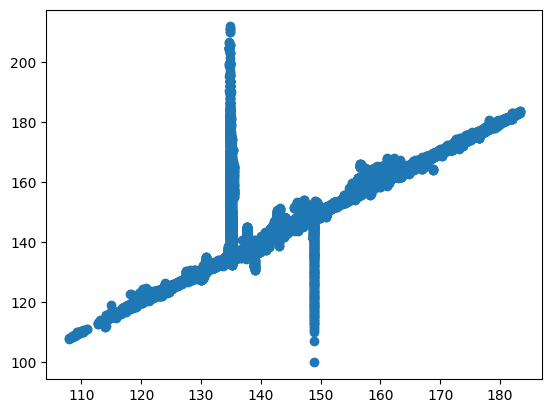

In [14]:
x = test_merged_df["average"]
y = test_merged_df["price"]

plt.scatter(x, y)
plt.show()

KeyError: 'premium'

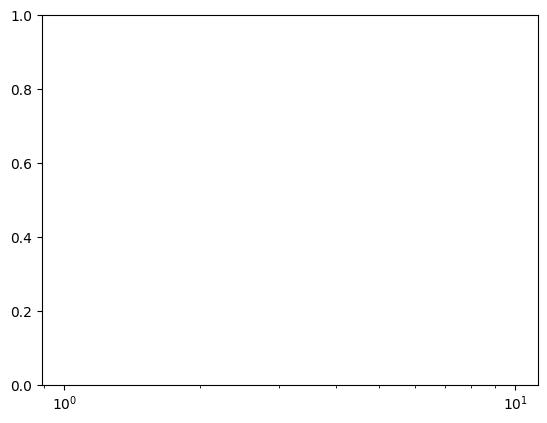

In [15]:
plt.xscale("log")
x = test_merged_df["size"]
y = test_merged_df["premium"]

plt.scatter(x, y)
plt.show()

In [ ]:
test_merged_df["premium"] = (test_merged_df["price"] / test_merged_df["average"]) -1

In [ ]:
test_merged_df

In [ ]:
plt.hist(test_merged_df["premium"])
plt.show()

In [17]:
df_new = AAPL_ftx_df.groupby('day').agg({'price':'mean', 'size':'mean', 'price*size':'mean'})

In [18]:
df_new.head()

,price,size,price*size
day,,,
2020-11-02,109.212778,2.218333,241.785567
2020-11-03,110.253750,3.393125,376.211887
2020-11-04,113.028696,1.376522,158.411643
2020-11-05,117.778235,1.020000,120.344194
2020-11-06,117.915085,2.177288,256.201864


In [19]:
df_new["weighted_price"] = df_new["price*size"] / df_new["size"]

In [20]:
df_new.head()

,price,size,price*size,weighted_price
day,,,,
2020-11-02,109.212778,2.218333,241.785567,108.994245
2020-11-03,110.253750,3.393125,376.211887,110.874750
2020-11-04,113.028696,1.376522,158.411643,115.081105
2020-11-05,117.778235,1.020000,120.344194,117.984504
2020-11-06,117.915085,2.177288,256.201864,117.670170


In [ ]:
intra_df = pd.read_csv("../intraday/AAPL_US_data.csv")

In [ ]:
intra_df.head()

In [ ]:
intra_df['datetime'] = pd.to_datetime(intra_df['datetime'])

# extract the day from the datetime object
intra_df['day'] = intra_df['datetime'].dt.date

intra_df['average'] = (intra_df['open'] + intra_df['high'] + intra_df['low'] + intra_df['close']) / 4

In [ ]:
intra_df = intra_df.groupby('day').agg({'average':'mean', 'volume':'mean'})

In [ ]:
intra_df.head()

In [ ]:
# merge dataframes based on their datetime index
merged_df = pd.merge(df_new, intra_df, left_index=True, right_index=True, how='inner')

# separate unmatched rows into two dataframes
df_new_unmatched = df_new.loc[~df_new.index.isin(merged_df.index)]
intra_df_unmatched = intra_df.loc[~intra_df.index.isin(merged_df.index)]

In [ ]:
merged_df.head()

In [ ]:
df_new_unmatched.head()

In [ ]:
# plot the data
merged_df.plot(y=['weighted_price', 'average'], kind='line')

# show the plot
plt.show()